In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def get_data():
  df = pd.read_csv("C:/Users/TANNERU/Downloads/Dataset for coding/ecommerce_data.csv")

  # easier to work with numpy array
  data = df.values

  # shuffle it
  np.random.shuffle(data)

  # split features and labels
  X = data[:,:-1]
  Y = data[:,-1].astype(np.int32)
  
  print(X.shape)
  print(Y.shape)

  # one-hot encode the categorical data
  # create a new matrix X2 with the correct number of columns
  N, D = X.shape
  X2 = np.zeros((N, D+3))
  print(X2.shape)
  X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

  # one-hot
  for n in range(N):
      t = int(X[n,D-1])
      X2[n,t+D-1] = 1


  # assign X2 back to X, since we don't need original anymore
  X = X2
  print(X.shape)

  # split train and test
  Xtrain = X[:-100]
  Ytrain = Y[:-100]
  Xtest = X[-100:]
  Ytest = Y[-100:]

  # normalize columns 1 and 2
  for i in (1, 2):
    m = Xtrain[:,i].mean()
    s = Xtrain[:,i].std()
    Xtrain[:,i] = (Xtrain[:,i] - m) / s
    Xtest[:,i] = (Xtest[:,i] - m) / s

  return Xtrain, Ytrain, Xtest, Ytest


def get_binary_data():
  # return only the data from the first 2 classes
  Xtrain, Ytrain, Xtest, Ytest = get_data()
  X2train = Xtrain[Ytrain <= 1]
  Y2train = Ytrain[Ytrain <= 1]
  X2test = Xtest[Ytest <= 1]
  Y2test = Ytest[Ytest <= 1]
  return X2train, Y2train, X2test, Y2test


(500, 5)
(500,)
(500, 8)
(500, 8)
Xtrain [[ 1.          2.04375892 -0.08765443 ...  0.          1.
   0.        ]
 [ 0.         -0.80468557  1.57186822 ...  0.          0.
   1.        ]
 [ 0.          0.14479593 -0.99181147 ...  0.          0.
   1.        ]
 ...
 [ 1.          0.14479593  0.39135332 ...  0.          0.
   1.        ]
 [ 1.         -0.80468557  0.51353744 ...  0.          0.
   0.        ]
 [ 0.          2.04375892 -1.06485943 ...  0.          0.
   0.        ]]
Xtest [[ 0.          0.14479593 -0.1697567   1.          0.          0.
   1.          0.        ]
 [ 0.         -0.80468557  0.74858874  0.          0.          1.
   0.          0.        ]
 [ 0.         -0.80468557  0.31699206  0.          0.          0.
   0.          1.        ]
 [ 0.          1.09427742 -0.9731045   1.          0.          1.
   0.          0.        ]
 [ 0.         -0.80468557 -0.68178283  1.          0.          1.
   0.          0.        ]
 [ 0.         -0.80468557 -0.13127686  1.   

2000 0.0743230502390527 0.13508717094492345
3000 0.07258429896496799 0.13623343114308287
4000 0.07168624836288583 0.13740674145765192
5000 0.07115067469745326 0.13848028582490157
6000 0.07080183907834592 0.13943466992984901
7000 0.07056069798091703 0.14027735877287584
8000 0.07038671337809116 0.1410217337902765
9000 0.07025706974046178 0.14168118209738736
Training classification rate 0.925
Testing classification rate 0.87


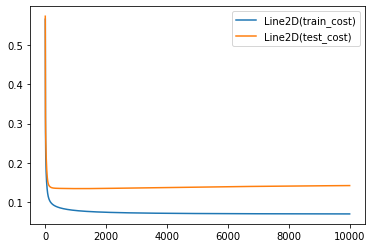

In [40]:
def y2indicator(y,K):
    N = len(y)
    print(N)
    indicator = np.zeros((N,K))
    print(indicator)
    for i in range(N):
        indicator[i,y[i]] = 1
    return indicator

Xtrain,Ytrain,Xtest,Ytest = get_data()
print("Xtrain",Xtrain)
print("Xtest",Xtest)
print("Ytrain",Ytrain)
print("Ytest",Ytest)


D = Xtrain.shape[1] # 8 
print(D)
K = len(set(Ytrain)|set(Ytest)) #4 
print(K)


#converting YTrain n YTest values to indicator values like 0's and 1's
Ytrain_ind = y2indicator(Ytrain,K)
Ytest_ind = y2indicator(Ytest,K)
print(Ytrain_ind.shape)
print(Ytest_ind.shape)


#initialising weights
w = np.random.randn(D,K) #8,4
b = np.zeros(K) #4
print(w)
print(b)



#softmax
def softmax(a):
    expA = np.exp(a)
    return expA/expA.sum(axis=1,keepdims=True)



def forward(X,w,b):
    return softmax(X.dot(w)+b) #probabilities 


def predict(P_Y_X):
    return np.argmax(P_Y_X,axis = 1) 



def classification_rate(Y,P):
    return np.mean(Y==P)




def cross_entropy(T,py):
    return -np.mean(T*np.log(py))




train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pytrain = forward(Xtrain,w,b) # probabilities 
    pytest = forward(Xtest,w,b) #probabilities
    
    
    ctrain = cross_entropy(Ytrain_ind,pytrain) #training cost
    ctest = cross_entropy(Ytest_ind,pytest) # testing cost
    
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    
    #gradient descent
    w -= learning_rate*Xtrain.T.dot(pytrain - Ytrain_ind)
    b -= learning_rate*(pytrain - Ytrain_ind).sum(axis=0)
    
    if i % 1000 == 0:
        print(i,ctrain,ctest)
        

        
print("Training classification rate",classification_rate(Ytrain,predict(pytrain)))
print("Testing classification rate",classification_rate(Ytest,predict(pytest)))
        
    
legend1, = plt.plot(train_costs,label = 'train_cost')
legend2, = plt.plot(test_costs,label = 'test_cost')
plt.legend([legend1,legend2])
plt.show()
    
    




In [31]:
Xtrain.shape[1]

8

In [32]:
len(set(Ytrain)|set(Ytest))

4

In [33]:
set(Ytrain)

{0, 1, 2, 3}

In [34]:
len(set(Ytrain))

4

In [35]:
len(set(Ytest))

4